# Analyse Cluster

The aim of this notebook is to analyse the clustering results in more detail and compare the clusters

### imports and preprocessing

In [1]:
import pickle
import json
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
np.random.seed(412)

In [3]:
specs = dict()

with open('obj/specjson210518.pkl', 'rb') as handle:
    specs = pickle.load(handle)

keys = list(specs.keys())
print(keys)
len(keys)

['1forge.com', '6-dot-authentiqio.appspot.com', 'adafruit.com', 'adobe.com:aem', 'adyen.com:CheckoutService', 'adyen.com:PaymentService', 'adyen.com:RecurringService', 'afterbanks.com', 'agco-ats.com', 'airport-web.appspot.com', 'amadeus.com', 'amazonaws.com:AWSMigrationHub', 'amazonaws.com:acm', 'amazonaws.com:acm-pca', 'amazonaws.com:alexaforbusiness', 'amazonaws.com:apigateway', 'amazonaws.com:application-autoscaling', 'amazonaws.com:appstream', 'amazonaws.com:appsync', 'amazonaws.com:athena', 'amazonaws.com:autoscaling', 'amazonaws.com:autoscaling-plans', 'amazonaws.com:batch', 'amazonaws.com:budgets', 'amazonaws.com:ce', 'amazonaws.com:cloud9', 'amazonaws.com:clouddirectory', 'amazonaws.com:cloudformation', 'amazonaws.com:cloudfront', 'amazonaws.com:cloudhsm', 'amazonaws.com:cloudhsmv2', 'amazonaws.com:cloudsearch', 'amazonaws.com:cloudsearchdomain', 'amazonaws.com:cloudtrail', 'amazonaws.com:codebuild', 'amazonaws.com:codecommit', 'amazonaws.com:codedeploy', 'amazonaws.com:codepi

1034

In [4]:
specs = dict()

with open('obj/specjson210518.pkl', 'rb') as handle:
    specs = pickle.load(handle)

keys = list(specs.keys())
print(keys)
len(keys)

['1forge.com', '6-dot-authentiqio.appspot.com', 'adafruit.com', 'adobe.com:aem', 'adyen.com:CheckoutService', 'adyen.com:PaymentService', 'adyen.com:RecurringService', 'afterbanks.com', 'agco-ats.com', 'airport-web.appspot.com', 'amadeus.com', 'amazonaws.com:AWSMigrationHub', 'amazonaws.com:acm', 'amazonaws.com:acm-pca', 'amazonaws.com:alexaforbusiness', 'amazonaws.com:apigateway', 'amazonaws.com:application-autoscaling', 'amazonaws.com:appstream', 'amazonaws.com:appsync', 'amazonaws.com:athena', 'amazonaws.com:autoscaling', 'amazonaws.com:autoscaling-plans', 'amazonaws.com:batch', 'amazonaws.com:budgets', 'amazonaws.com:ce', 'amazonaws.com:cloud9', 'amazonaws.com:clouddirectory', 'amazonaws.com:cloudformation', 'amazonaws.com:cloudfront', 'amazonaws.com:cloudhsm', 'amazonaws.com:cloudhsmv2', 'amazonaws.com:cloudsearch', 'amazonaws.com:cloudsearchdomain', 'amazonaws.com:cloudtrail', 'amazonaws.com:codebuild', 'amazonaws.com:codecommit', 'amazonaws.com:codedeploy', 'amazonaws.com:codepi

1034

## length of the specs

In [5]:
specs_string = dict()

for spec in specs:
    str_spec = json.dumps(specs[spec])
    specs_string[spec] = str_spec
print(len(specs_string.keys()))

1034


In [6]:
with open('obj/specs_string.pkl', 'wb') as handle:
    pickle.dump(specs_string, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
spec_len = list()
for spec in specs_string:
    length = len(specs_string[spec])
    spec_len.append(length)
print(len(spec_len))

1034


In [8]:
#minimal length of spec
min(spec_len)

1362

In [9]:
#maximal length of spec
max(spec_len)

3259941

In [10]:
#mean length of spec
np.mean(spec_len)

77842.50580270794

In [11]:
#median length of spec
np.median(spec_len)

30538.5

In [12]:
#mode of list
max(set(spec_len), key=spec_len.count)

2883

In [13]:
with open('obj/spec_len.pkl', 'wb') as handle:
    pickle.dump(spec_len, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Length of the info object

In [14]:
info_objs = dict()

with open('obj/infodict0518.pkl', 'rb') as handle:
    info_objs = pickle.load(handle)

keys = list(info_objs.keys())
print(keys)
len(keys)

['1forge.com', '6-dot-authentiqio.appspot.com', 'adafruit.com', 'adobe.com:aem', 'adyen.com:CheckoutService', 'adyen.com:PaymentService', 'adyen.com:RecurringService', 'afterbanks.com', 'agco-ats.com', 'airport-web.appspot.com', 'amadeus.com', 'amazonaws.com:AWSMigrationHub', 'amazonaws.com:acm', 'amazonaws.com:acm-pca', 'amazonaws.com:alexaforbusiness', 'amazonaws.com:apigateway', 'amazonaws.com:application-autoscaling', 'amazonaws.com:appstream', 'amazonaws.com:appsync', 'amazonaws.com:athena', 'amazonaws.com:autoscaling', 'amazonaws.com:autoscaling-plans', 'amazonaws.com:batch', 'amazonaws.com:budgets', 'amazonaws.com:ce', 'amazonaws.com:cloud9', 'amazonaws.com:clouddirectory', 'amazonaws.com:cloudformation', 'amazonaws.com:cloudfront', 'amazonaws.com:cloudhsm', 'amazonaws.com:cloudhsmv2', 'amazonaws.com:cloudsearch', 'amazonaws.com:cloudsearchdomain', 'amazonaws.com:cloudtrail', 'amazonaws.com:codebuild', 'amazonaws.com:codecommit', 'amazonaws.com:codedeploy', 'amazonaws.com:codepi

1034

In [15]:
info_objs[keys[0]]

{'contact': {'email': 'contact@1forge.com',
  'name': '1Forge',
  'url': 'http://1forge.com'},
 'description': 'Stock and Forex Data and Realtime Quotes',
 'title': '1Forge Finance APIs',
 'version': '0.0.1',
 'x-apisguru-categories': ['financial'],
 'x-logo': {'backgroundColor': '#24292e',
  'url': 'https://api.apis.guru/v2/cache/logo/http_1forge.com_logo.png'},
 'x-origin': [{'format': 'swagger',
   'url': 'http://1forge.com/openapi.json',
   'version': '2.0'}],
 'x-preferred': True,
 'x-providerName': '1forge.com'}

In [16]:
info_string = dict()

for info in specs:
    str_info = json.dumps(info_objs[info])
    info_string[info] = str_info
print(len(info_string.keys()))

1034


In [17]:
info_len = list()
for inf in info_string:
    length = len(info_string[inf])
    info_len.append(length)
print(len(info_len))

1034


In [18]:
#minimal length of info
min(info_len)

275

In [19]:
#maximal length of info
max(info_len)

36691

In [20]:
#mean length of info
np.mean(info_len)

1069.220502901354

In [21]:
#median length of info
np.median(info_len)

735.5

In [22]:
#mode of list
max(set(info_len), key=info_len.count)

680

In [23]:
with open('obj/info_len.pkl', 'wb') as handle:
    pickle.dump(info_len, handle, protocol=pickle.HIGHEST_PROTOCOL)

## prepare dataframes for extensiveness and structure

In [24]:
pathdf = pd.read_csv('PAMpath0518.csv',index_col='X')
pathdf = pathdf.iloc[:,1:]
pathdf['spec_len'] = spec_len
pathdf['info_len'] = info_len
pathdf.head()

,paths,operations,pam_fit$clustering,spec_len,info_len
X,,,,,
1forge.com,2,2,1,1362,503
6-dot-authentiqio.appspot.com,5,14,2,13452,776
adafruit.com,34,69,3,65937,4752
adobe.com:aem,27,31,4,22375,689
adyen.com:CheckoutService,2,2,1,32474,921


In [25]:

col_list = ['swagger','info','host','basePath','schemes','consumes','produces','paths','definitions','parameters','responses','securityDefinitions','security','tags','externalDocs','title','description','termsOfService','contact','license','version']
col_list

['swagger',
 'info',
 'host',
 'basePath',
 'schemes',
 'consumes',
 'produces',
 'paths',
 'definitions',
 'parameters',
 'responses',
 'securityDefinitions',
 'security',
 'tags',
 'externalDocs',
 'title',
 'description',
 'termsOfService',
 'contact',
 'license',
 'version']

In [26]:
structdf = pd.read_csv('PAMcomplete0518.csv',index_col='X')
structdf = structdf.iloc[:,1:]
structdf['fields'] = structdf[col_list].sum(axis=1)
structdf['spec_len'] = spec_len
structdf['info_len'] = info_len
structdf.head()

,swagger,info,host,basePath,schemes,consumes,produces,paths,definitions,parameters,...,title,description,termsOfService,contact,license,version,pam_fit$clustering,fields,spec_len,info_len
X,,,,,,,,,,,,,,,,,,,,,
1forge.com,1,1,1,1,1,0,1,1,0,0,...,1,1,0,1,0,1,1,11,1362,503
6-dot-authentiqio.appspot.com,1,1,1,1,1,0,0,1,1,1,...,1,1,1,1,1,1,2,15,13452,776
adafruit.com,1,1,1,1,1,0,1,1,1,1,...,1,1,0,0,0,1,3,14,65937,4752
adobe.com:aem,1,1,1,1,1,0,0,1,1,0,...,1,1,0,1,0,1,3,13,22375,689
adyen.com:CheckoutService,0,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,1,6,32474,921


## Paths Clustering Results

In [27]:
# cluster of path
pathdf['pam_fit$clustering'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18], dtype=int64)

Plot of Cluster:

![Plot of 18 Cluster](PlotPath0518.png)

Similarity: (first two most similar, last most dissimilar)

In [28]:
SimPathdf = pd.read_csv('Pathsimilar.csv',index_col='X')
SimPathdf = SimPathdf.iloc[:,1:]
SimPathdf.head()

,paths,operations
X,,
googleapis.com:games,52,105
amazonaws.com:autoscaling,52,104
kubernetes.io,488,1381
amazonaws.com:entitlement.marketplace,1,2


Distribution of clusters across the dataset:

In [29]:
#daat.YEARMONTH.value_counts()
pathdf['pam_fit$clustering'].value_counts()

8     102
1      91
4      87
9      86
13     82
12     72
2      70
3      64
15     62
5      62
14     57
6      48
17     43
11     39
10     36
7      18
16     14
18      1
Name: pam_fit$clustering, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019ED617C080>,
      dtype=object)

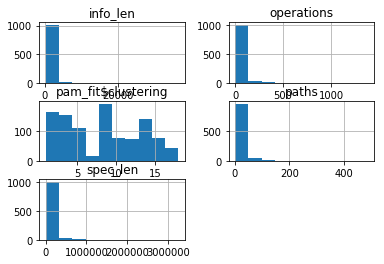

In [30]:
pathdf.hist()

In [31]:
#TODO: Add Charts of correlation


In [32]:
pathdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1034 entries, 1forge.com to zuora.com
Data columns (total 5 columns):
paths                 1034 non-null int64
operations            1034 non-null int64
pam_fit$clustering    1034 non-null int64
spec_len              1034 non-null int64
info_len              1034 non-null int64
dtypes: int64(5)
memory usage: 48.5+ KB


In [33]:
pathdf.groupby('pam_fit$clustering').min()

,paths,operations,spec_len,info_len
pam_fit$clustering,,,,
1,1,2,1362,341
2,5,13,8700,428
3,22,49,29567,403
4,9,24,10787,435
5,3,7,4410,379
6,1,3,3210,424
7,87,116,97302,388
8,1,1,1446,398
9,5,18,10124,367


In [34]:
pathdf.groupby('pam_fit$clustering').aggregate(['min', np.median, np.mean, max])

paths                         operations          \
                     min median        mean  max        min  median   
pam_fit$clustering                                                    
1                      1    2.0    1.714286    2          2     2.0   
2                      5   11.0   10.857143   17         13    15.0   
3                     22   34.0   35.375000   68         49    62.5   
4                      9   16.0   18.597701   32         24    29.0   
5                      3    5.5    5.725806    9          7     8.0   
6                      1    3.0    2.666667    3          3     3.0   
7                     87  116.0  116.833333  157        116   190.5   
8                      1    1.0    1.000000    1          1     1.0   
9                      5   12.0   12.720930   23         18    20.0   
10                    32   44.5   47.333333   67         70    95.5   
11                    52   75.0   76.128205  108         85   126.0   
12                    12   23.0   24.750000   44         33    40.0   
13                     3    7.0    7.158537   12         10    11.0   
14                     2    3.0    3.912281    6          6     6.0   
15                     1    2.0    2.870968    4          4     4.0   
16                   160  221.0  226.285714  277        206   330.0   
17                     2    3.0    3.348837    5          5     5.0   
18                   488  488.0  488.000000  488       1381  1381.0   

                                      spec_len                           \
                           mean   max      min     median          mean   
pam_fit$clustering                                                        
1                      2.000000     2     1362     7054.0  1.016251e+04   
2                     15.142857    17     8700    31438.5  4.286070e+04   
3                     62.921875    85    29567   111714.0  1.232480e+05   
4                     29.160920    35    10787    62838.0  7.084769e+04   
5                      7.983871     9     4410    22973.5  2.968797e+04   
6                      3.000000     3     3210    10685.0  2.987971e+04   
7                    202.333333   321    97302   454998.0  4.173021e+05   
8                      1.000000     1     1446     4049.5  1.394662e+04   
9                     20.267442    25    10124    42639.0  5.606556e+04   
10                    93.888889   132    34509   179097.0  1.903729e+05   
11                   128.871795   199    71599   235074.0  2.631408e+05   
12                    40.347222    51    15449    69738.5  8.463212e+04   
13                    11.000000    13     8079    29489.5  4.450795e+04   
14                     6.070175     7     4286    19657.0  2.177011e+04   
15                     4.000000     4     2194    12979.0  1.638661e+04   
16                   346.785714   548   123668   600593.5  8.721531e+05   
17                     5.000000     5     3753    17029.0  2.540093e+04   
18                  1381.000000  1381  3063649  3063649.0  3.063649e+06   

                            info_len                              
                        max      min  median         mean    max  
pam_fit$clustering                                                
1                     54642      341   712.0   749.791209   1703  
2                    164379      428   774.0  1103.842857   4262  
3                    320353      403  1002.5  1634.203125   9670  
4                    297325      435   748.0  1208.206897   4892  
5                     94658      379   717.0   847.548387   2653  
6                    330428      424   651.0   688.479167   1339  
7                    865317      388   726.0  1353.388889   4415  
8                    667753      398   639.0   633.441176   1246  
9                    205995      367   820.0  1134.755814   8508  
10                   592367      426   799.0  1453.611111   7420  
11                   682246      362   933.0  1927.615385  14564  
12           

In [35]:
pathdf.groupby('pam_fit$clustering').describe()

info_len                                                   \
                      count         mean          std    min     25%     50%   
pam_fit$clustering                                                             
1                      91.0   749.791209   228.362067  341.0  618.50   712.0   
2                      70.0  1103.842857   883.178263  428.0  599.00   774.0   
3                      64.0  1634.203125  1693.554046  403.0  718.25  1002.5   
4                      87.0  1208.206897   998.293185  435.0  640.00   748.0   
5                      62.0   847.548387   460.998584  379.0  634.75   717.0   
6                      48.0   688.479167   200.868750  424.0  506.25   651.0   
7                      18.0  1353.388889  1254.459065  388.0  609.75   726.0   
8                     102.0   633.441176   190.112191  398.0  455.50   639.0   
9                      86.0  1134.755814  1167.401740  367.0  679.75   820.0   
10                     36.0  1453.611111  1432.789931  426.0  697.00   799.0   
11                     39.0  1927.615385  2602.929995  362.0  644.50   933.0   
12                     72.0  1193.750000   935.160659  275.0  620.75   761.0   
13                     82.0   965.378049   703.584502  418.0  614.25   756.5   
14                     57.0   933.491228   565.394967  386.0  626.00   750.0   
15                     62.0   845.532258   575.136269  408.0  624.50   735.5   
16                     14.0  3284.000000  9618.405065  450.0  515.50   684.0   
17                     43.0   779.883721   178.981405  429.0  664.50   727.0   
18                      1.0   454.000000          NaN  454.0  454.00   454.0   

                                     operations                 ...      \
                        75%      max      count         mean    ...       
pam_fit$clustering                                              ...       
1                    869.00   1703.0       91.0     2.000000    ...       
2                   1089.25   4262.0       70.0    15.142857    ...       
3                   1974.50   9670.0       64.0    62.921875    ...       
4                   1419.50   4892.0       87.0    29.160920    ...       
5                    865.00   2653.0       62.0     7.983871    ...       
6                    788.50   1339.0       48.0     3.000000    ...       
7                   1298.25   4415.0       18.0   202.333333    ...       
8                    734.50   1246.0      102.0     1.000000    ...       
9                   1084.25   8508.0       86.0    20.267442    ...       
10                  1737.00   7420.0       36.0    93.888889    ...       
11                  1736.50  14564.0       39.0   128.871795    ...       
12                  1490.75   4953.0       72.0    40.347222    ...       
13                   917.00   4400.0       82.0    11.000000    ...       
14                   941.00   3695.0       57.0     6.070175    ...       
15                   836.75   4487.0       62.0     4.000000    ...       
16                   951.00  36691.0       14.0   346.785714    ...       
17                   913.00   1187.0       43.0     5.000000    ...       
18                   454.00    454.0        1.0  1381.000000    ...       

                     paths        spec_len                               \
                       75%    max    count          mean            std   
pam_fit$clustering                                                        
1                     2.00    2.0     91.0  1.016251e+04    9307.297084   
2                    14.00   17.0     70.0  4.286070e+04   33617.593538   
3                    39.25   68.0     64.0  1.232480e+05   60234.176062   
4                    24.00   32.0     87.0  7.084769e+04   47440.840790   
5                     7.00    9.0     62.0  2.968797e+04   22383.070150   
6                     3.00    3.0     48.0  2.987971e+04   61664.617263   
7                   123.75  157.0     18.0  4.173021e+05  189211.988794   
8           

In [36]:
#Determine pivot table
impute_grps = pathdf.pivot_table(values=["operations","paths"], index=["pam_fit$clustering"], aggfunc=np.mean)
print(impute_grps) 

                     operations       paths
pam_fit$clustering                         
1                      2.000000    1.714286
2                     15.142857   10.857143
3                     62.921875   35.375000
4                     29.160920   18.597701
5                      7.983871    5.725806
6                      3.000000    2.666667
7                    202.333333  116.833333
8                      1.000000    1.000000
9                     20.267442   12.720930
10                    93.888889   47.333333
11                   128.871795   76.128205
12                    40.347222   24.750000
13                    11.000000    7.158537
14                     6.070175    3.912281
15                     4.000000    2.870968
16                   346.785714  226.285714
17                     5.000000    3.348837
18                  1381.000000  488.000000


In [37]:
impute_grps.sort_values('operations')

,operations,paths
pam_fit$clustering,,
8,1.000000,1.000000
1,2.000000,1.714286
6,3.000000,2.666667
15,4.000000,2.870968
17,5.000000,3.348837
14,6.070175,3.912281
5,7.983871,5.725806
13,11.000000,7.158537
2,15.142857,10.857143


In [38]:
mean_len = pathdf[["pam_fit$clustering","spec_len"]]
mean_len = mean_len.groupby('pam_fit$clustering').mean().astype(int)
mean_len

,spec_len
pam_fit$clustering,
1,10162
2,42860
3,123248
4,70847
5,29687
6,29879
7,417302
8,13946
9,56065


In [39]:
med_len = pathdf[["pam_fit$clustering","spec_len"]]
med_len = med_len.groupby('pam_fit$clustering').median()
med_len


,spec_len
pam_fit$clustering,
1,7054.0
2,31438.5
3,111714.0
4,62838.0
5,22973.5
6,10685.0
7,454998.0
8,4049.5
9,42639.0


In [40]:
med_info = pathdf[["pam_fit$clustering","info_len"]]
med_info = med_info.groupby('pam_fit$clustering').median()
med_info

,info_len
pam_fit$clustering,
1,712.0
2,774.0
3,1002.5
4,748.0
5,717.0
6,651.0
7,726.0
8,639.0
9,820.0


In [41]:
mean_info = pathdf[["pam_fit$clustering","info_len"]]
mean_info = mean_info.groupby('pam_fit$clustering').mean().astype(int)
mean_info

,info_len
pam_fit$clustering,
1,749
2,1103
3,1634
4,1208
5,847
6,688
7,1353
8,633
9,1134


In [42]:
impute_grps = impute_grps.sort_values('paths')
impute_grps['count'] = pathdf['pam_fit$clustering'].value_counts()
impute_grps['length'] = mean_len
impute_grps['length_med'] = med_len
impute_grps['info'] = mean_info
impute_grps['info_med'] = med_info
impute_grps

,operations,paths,count,length,length_med,info,info_med
pam_fit$clustering,,,,,,,
8,1.000000,1.000000,102,13946,4049.5,633,639.0
1,2.000000,1.714286,91,10162,7054.0,749,712.0
6,3.000000,2.666667,48,29879,10685.0,688,651.0
15,4.000000,2.870968,62,16386,12979.0,845,735.5
17,5.000000,3.348837,43,25400,17029.0,779,727.0
14,6.070175,3.912281,57,21770,19657.0,933,750.0
5,7.983871,5.725806,62,29687,22973.5,847,717.0
13,11.000000,7.158537,82,44507,29489.5,965,756.5
2,15.142857,10.857143,70,42860,31438.5,1103,774.0


In [43]:

stats.f_oneway(impute_grps['operations'], impute_grps['paths'], impute_grps['length'], impute_grps['info'])

F_onewayResult(statistic=3.071982704328403, pvalue=0.033478762875532316)

In [44]:
impute_grps.corr()

,operations,paths,count,length,length_med,info,info_med
operations,1.000000,0.978232,-0.656551,0.999241,0.998341,-0.026283,-0.596480
paths,0.978232,1.000000,-0.732245,0.981793,0.965909,0.167434,-0.551645
count,-0.656551,-0.732245,1.000000,-0.658220,-0.637253,-0.361215,0.275381
length,0.999241,0.981793,-0.658220,1.000000,0.996128,-0.008251,-0.607849
length_med,0.998341,0.965909,-0.637253,0.996128,1.000000,-0.080846,-0.607825
info,-0.026283,0.167434,-0.361215,-0.008251,-0.080846,1.000000,0.383802
info_med,-0.596480,-0.551645,0.275381,-0.607849,-0.607825,0.383802,1.000000


In [45]:
impute_grps.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,operations,paths,count,length,length_med,info,info_med
operations,1.0,0.98,-0.66,1.0,1.0,-0.026,-0.6
paths,0.98,1.0,-0.73,0.98,0.97,0.17,-0.55
count,-0.66,-0.73,1.0,-0.66,-0.64,-0.36,0.28
length,1.0,0.98,-0.66,1.0,1.0,-0.0083,-0.61
length_med,1.0,0.97,-0.64,1.0,1.0,-0.081,-0.61
info,-0.026,0.17,-0.36,-0.0083,-0.081,1.0,0.38
info_med,-0.6,-0.55,0.28,-0.61,-0.61,0.38,1.0


In [46]:
impute_grps.corr(method='kendall').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,operations,paths,count,length,length_med,info,info_med
operations,1.0,1.0,-0.43,0.91,1.0,0.67,0.27
paths,1.0,1.0,-0.43,0.91,1.0,0.67,0.27
count,-0.43,-0.43,1.0,-0.45,-0.43,-0.13,0.1
length,0.91,0.91,-0.45,1.0,0.91,0.58,0.18
length_med,1.0,1.0,-0.43,0.91,1.0,0.67,0.27
info,0.67,0.67,-0.13,0.58,0.67,1.0,0.57
info_med,0.27,0.27,0.1,0.18,0.27,0.57,1.0


In [47]:
impute_grps.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,operations,paths,count,length,length_med,info,info_med
operations,1.0,1.0,-0.61,0.97,1.0,0.66,0.26
paths,1.0,1.0,-0.61,0.97,1.0,0.66,0.26
count,-0.61,-0.61,1.0,-0.61,-0.61,-0.22,0.15
length,0.97,0.97,-0.61,1.0,0.97,0.62,0.2
length_med,1.0,1.0,-0.61,0.97,1.0,0.66,0.26
info,0.66,0.66,-0.22,0.62,0.66,1.0,0.65
info_med,0.26,0.26,0.15,0.2,0.26,0.65,1.0


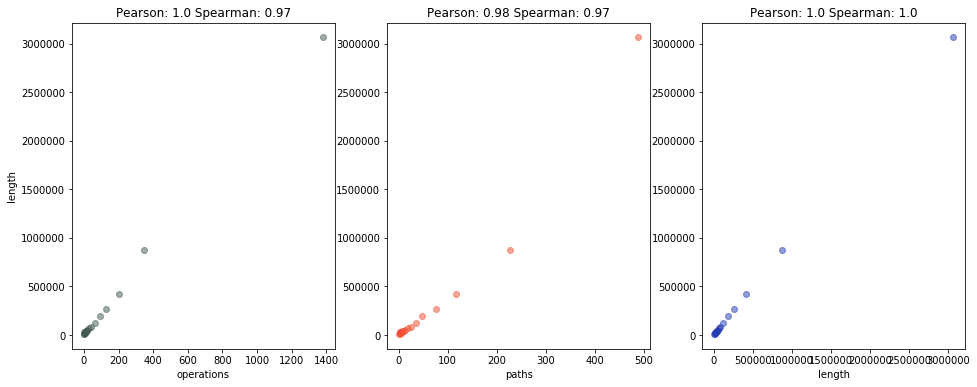

In [48]:
# plot correlated values
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['operations', 'paths', 'length']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('length')
    i.scatter(impute_grps[cols[j]], impute_grps['length'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%impute_grps.corr().loc[cols[j]]['length'].round(2)+' Spearman: %s'%impute_grps.corr(method='spearman').loc[cols[j]]['length'].round(2))
    j+=1

plt.show()

In [49]:
impute_grps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 8 to 18
Data columns (total 7 columns):
operations    18 non-null float64
paths         18 non-null float64
count         18 non-null int64
length        18 non-null int32
length_med    18 non-null float64
info          18 non-null int32
info_med      18 non-null float64
dtypes: float64(4), int32(2), int64(1)
memory usage: 1.6 KB


Now lets look into certain clusters:

In [50]:
cluster_n =  pathdf['pam_fit$clustering']==16
pathdf[cluster_n]

,paths,operations,pam_fit$clustering,spec_len,info_len
X,,,,,
amazonaws.com:ec2,274,548,16,1138764,1303
azure.com:web-WebApps,224,311,16,945329,577
azure.com:web-service,213,295,16,412052,1023
ccp.is,191,206,16,891599,456
clever-cloud.com,188,274,16,123668,477
docusign.net,160,463,16,1411347,725
geodesystems.com,236,236,16,685831,631
gitlab.com,251,358,16,341787,696
googleapis.com:compute,214,535,16,1129084,672


## Structure Clustering Results

In [51]:
# cluster of path
structdf['pam_fit$clustering'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

Plot of Clusters:

K = 8
![Plot of 8 Cluster](PlotStruct0518.png)

K = 4
![Plot of 4 Cluster](plotStruct40518.png)

K = 20
![Plot of 20 Cluster](plotStruct200518.png)

Similarity: (first two most similar, last most dissimilar)

In [52]:
SimStructdf = pd.read_csv('Structsimilar.csv',index_col='X')
SimStructdf = SimStructdf.iloc[:,1:]
SimStructdf.head()

,swagger,info,host,basePath,schemes,consumes,produces,paths,definitions,parameters,...,securityDefinitions,security,tags,externalDocs,title,description,termsOfService,contact,license,version
X,,,,,,,,,,,,,,,,,,,,,
landregistry.gov.uk:deed,1,1,1,1,1,0,1,1,1,0,...,0,0,0,0,1,1,0,1,0,1
1forge.com,1,1,1,1,1,0,1,1,0,0,...,0,0,0,0,1,1,0,1,0,1
brex.io,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
amazonaws.com:kinesisanalytics,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1


Distribution of clusters across the dataset:

In [53]:
structdf['pam_fit$clustering'].value_counts()

7    222
5    175
3    149
8    125
4    109
1    101
6     98
2     55
Name: pam_fit$clustering, dtype: int64

In [54]:
cor_df = structdf[['fields','spec_len','info_len','pam_fit$clustering']]

In [55]:
stats.f_oneway(structdf['fields'],structdf['spec_len'],structdf['info_len'])

F_onewayResult(statistic=182.0045995803374, pvalue=1.8382692565917218e-75)

In [56]:
cor_df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,fields,spec_len,info_len,pam_fit$clustering
fields,1.0,0.11,0.26,0.13
spec_len,0.11,1.0,0.47,-0.016
info_len,0.26,0.47,1.0,-0.078
pam_fit$clustering,0.13,-0.016,-0.078,1.0


In [57]:
cor_df.corr(method='kendall').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,fields,spec_len,info_len,pam_fit$clustering
fields,1.0,0.23,0.48,0.13
spec_len,0.23,1.0,0.22,0.076
info_len,0.48,0.22,1.0,0.051
pam_fit$clustering,0.13,0.076,0.051,1.0


In [58]:
cor_df.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,fields,spec_len,info_len,pam_fit$clustering
fields,1.0,0.31,0.61,0.13
spec_len,0.31,1.0,0.32,0.11
info_len,0.61,0.32,1.0,0.07
pam_fit$clustering,0.13,0.11,0.07,1.0


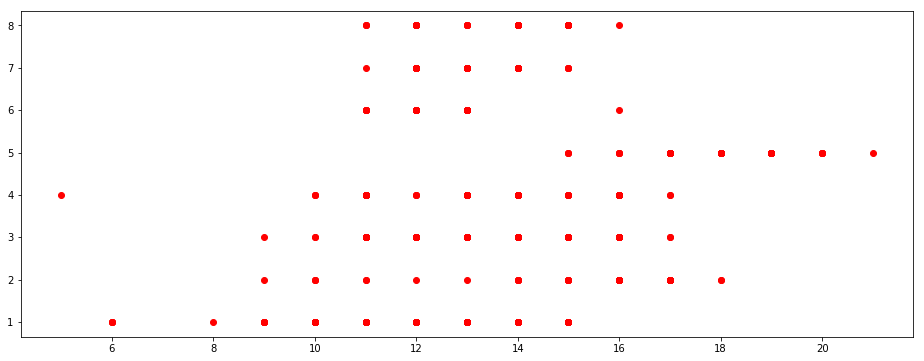

In [59]:

plt.plot(structdf['fields'],structdf['pam_fit$clustering'], 'ro')

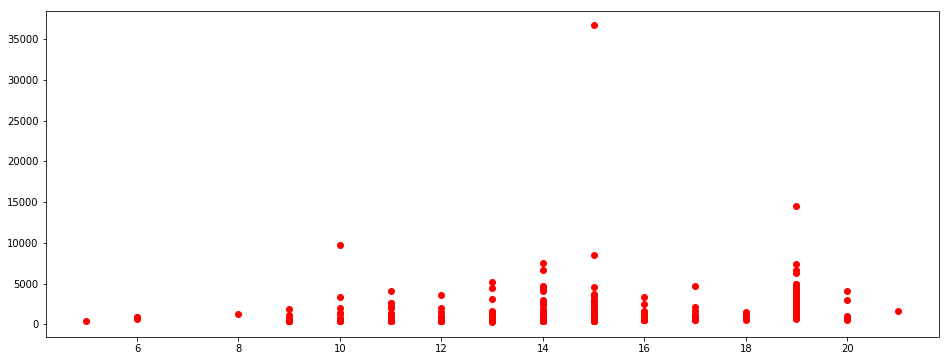

In [60]:
plt.plot(structdf['fields'],structdf['info_len'], 'ro')

In [61]:
display(structdf.groupby('pam_fit$clustering').median())

,swagger,info,host,basePath,schemes,consumes,produces,paths,definitions,parameters,...,externalDocs,title,description,termsOfService,contact,license,version,fields,spec_len,info_len
pam_fit$clustering,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,12.0,24779.0,652.0
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,16.0,29518.0,933.0
3,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,14.0,20280.0,568.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,13.0,8700.0,526.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,19.0,85534.0,1494.0
6,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13.0,26579.0,624.0
7,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,14.0,24208.5,762.0
8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,15.0,46612.0,743.0


In [62]:
structdf.groupby('pam_fit$clustering').min()

,swagger,info,host,basePath,schemes,consumes,produces,paths,definitions,parameters,...,externalDocs,title,description,termsOfService,contact,license,version,fields,spec_len,info_len
pam_fit$clustering,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,6,1362,362
2,0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,1,9,3636,519
3,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,9,1540,379
4,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,5,1435,341
5,1,1,1,0,1,1,1,1,0,0,...,0,1,0,0,0,0,1,15,2483,507
6,1,1,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,11,1529,275
7,1,1,1,0,1,0,0,1,1,0,...,0,1,1,0,0,0,1,11,3147,453
8,1,1,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,11,1526,398


In [63]:
stat_struct = structdf[["pam_fit$clustering","spec_len"]]
stat_struct = stat_struct.groupby('pam_fit$clustering').median()
stat_struct

,spec_len
pam_fit$clustering,
1,24779.0
2,29518.0
3,20280.0
4,8700.0
5,85534.0
6,26579.0
7,24208.5
8,46612.0


In [64]:
# medoidscomplete0518.csv
medoidpathdf = pd.read_csv('medoidscomplete0518.csv',index_col='X')
medoidpathdf = medoidpathdf.iloc[:,1:]
#pathdf['spec_len'] = spec_len
with pd.option_context('display.max_rows', None, 'display.max_columns', 30):
    print(medoidpathdf)


                                 swagger  info  host  basePath  schemes  \
X                                                                         
weatherbit.io                          1     1     1         1        1   
googleapis.com:adexchangebuyer2        1     1     1         1        1   
voodoomfg.com                          1     1     1         1        1   
neowsapp.com                           1     1     1         1        1   
amazonaws.com:xray                     1     1     1         1        1   
azure.com:automation-account           1     1     1         0        1   
windows.net:graphrbac                  1     1     1         0        1   
googleapis.com:youtubereporting        1     1     1         1        1   

                                 consumes  produces  paths  definitions  \
X                                                                         
weatherbit.io                           0         1      1            1   
googleapis.com:adexchang

In [65]:
medoids = list(medoidpathdf.index.values)
print(type(medoids))
medoids

<class 'list'>


['weatherbit.io',
 'googleapis.com:adexchangebuyer2',
 'voodoomfg.com',
 'neowsapp.com',
 'amazonaws.com:xray',
 'azure.com:automation-account',
 'windows.net:graphrbac',
 'googleapis.com:youtubereporting']

In [66]:
medoids_df = structdf.loc[medoids]
medoids_df = medoids_df[["pam_fit$clustering", "spec_len"]]
medoids_df

,pam_fit$clustering,spec_len
X,,
weatherbit.io,1,121837
googleapis.com:adexchangebuyer2,2,84758
voodoomfg.com,3,23647
neowsapp.com,4,9342
amazonaws.com:xray,5,38236
azure.com:automation-account,6,67102
windows.net:graphrbac,7,61023
googleapis.com:youtubereporting,8,25702


In [67]:
lengths_struct = []
for i in range(1,9):
    cluster_n =  structdf['pam_fit$clustering']== i
    clust_df = structdf[cluster_n]
    mean = clust_df["spec_len"].mean().astype(int)
    median = clust_df["spec_len"].median()
    print("Cluster {} has a spec length mean of {} and a median of {}".format(i, mean, median))
    lengths_struct.append([i, mean, median])

Cluster 1 has a spec length mean of 79640 and a median of 24779.0
Cluster 2 has a spec length mean of 69359 and a median of 29518.0
Cluster 3 has a spec length mean of 69641 and a median of 20280.0
Cluster 4 has a spec length mean of 65690 and a median of 8700.0
Cluster 5 has a spec length mean of 132920 and a median of 85534.0
Cluster 6 has a spec length mean of 62940 and a median of 26579.0
Cluster 7 has a spec length mean of 48941 and a median of 24208.5
Cluster 8 has a spec length mean of 86398 and a median of 46612.0


In [68]:
lengths_struct

[[1, 79640, 24779.0],
 [2, 69359, 29518.0],
 [3, 69641, 20280.0],
 [4, 65690, 8700.0],
 [5, 132920, 85534.0],
 [6, 62940, 26579.0],
 [7, 48941, 24208.5],
 [8, 86398, 46612.0]]

In [69]:
len_df = pd.DataFrame.from_records(lengths_struct)
len_df.columns = ['cluster','mean', 'median']
len_df.set_index('cluster', inplace=True)
len_df

,mean,median
cluster,,
1,79640,24779.0
2,69359,29518.0
3,69641,20280.0
4,65690,8700.0
5,132920,85534.0
6,62940,26579.0
7,48941,24208.5
8,86398,46612.0


Now lets look into certain clusters:

In [76]:
cluster_n =  structdf['pam_fit$clustering']==6
structdf[cluster_n]

,swagger,info,host,basePath,schemes,consumes,produces,paths,definitions,parameters,...,title,description,termsOfService,contact,license,version,pam_fit$clustering,fields,spec_len,info_len
X,,,,,,,,,,,,,,,,,,,,,
aviationdata.systems,1,1,1,0,1,1,1,1,1,0,...,1,0,0,1,0,1,6,12,9256,439
azure.com:automation-account,1,1,1,0,1,1,1,1,1,1,...,1,0,0,0,0,1,6,13,67102,600
azure.com:automation-certificate,1,1,1,0,1,1,1,1,1,1,...,1,0,0,0,0,1,6,13,19729,608
azure.com:automation-connection,1,1,1,0,1,1,1,1,1,1,...,1,0,0,0,0,1,6,13,80033,606
azure.com:automation-connectionType,1,1,1,0,1,1,1,1,1,1,...,1,0,0,0,0,1,6,13,119612,614
azure.com:automation-credential,1,1,1,0,1,1,1,1,1,1,...,1,0,0,0,0,1,6,13,91419,606
azure.com:automation-dscCompilationJob,1,1,1,0,1,1,1,1,1,1,...,1,0,0,0,0,1,6,13,29663,620
azure.com:automation-dscConfiguration,1,1,1,0,1,1,1,1,1,1,...,1,0,0,0,0,1,6,13,38365,618
azure.com:automation-dscNode,1,1,1,0,1,1,1,1,1,1,...,1,0,0,0,0,1,6,13,58758,600
